In [2]:
from __future__ import print_function

import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from timeit import default_timer as timer

<h3><div style="text-align: center"> Estudio Numérico de Solitones Mediante la Ecuación KdV </div></h3>
<div style="text-align: center"> Tesis para optar por el grado de Licenciado en Ciencias de la Tierra</div>
<div style="text-align: center"> Universidad Nacional Autónoma de México</div>
<div style="text-align: right"> ~Aaron Ernesto Contreras Roque</div>


<div style="text-align: justify">
En este notebook se codifican cuatro esquemas numéricos para resolver la ecuación KdV. Se tomó como punto de partida el proyecto final de Tiago Correia, para el curso #4301 del AMPA, Columbia University}, 2018 (véase <a href="https://github.com/modessert/Numerical-Methods-KDV/blob/master/numerical_KDV.ipynb">https://github.com/modessert/Numerical-Methods-KDV/blob/master/numerical_KDV.ipynb</a>). Trabajamos el caso unidireccional, adimensional y con fronteras periódicas (la teoría del proyecto se ha establecido en el escrito de la tesis y, para profundizar en la teoría, se refiere al usuario a las fuentes registradas en dicho texto). Por otra parte, utilizamos la forma de Kruskal y Zabuzky (1965) de la KdV:
</div>

\begin{equation}
\eta_{t} + \eta \eta_{x} + \delta^{2}\eta_{3x} = 0,
\end{equation}
donde $\eta$ representa la amplitud del solitón, $\delta^{2}$ es un parámetro dispersivo que modifica la amplitud de la onda. 

<div style="text-align: justify">   
El trabajo consistió en comparar cuatro esquemas numéricos: implícito y tres explícitos. Notése que el parámetro $\delta^{2}$ se sustituyó por $\epsilon$ (notación de Zhu, 2000). Además, por practicidad, la variable $\eta$ será sustituida por *u* a lo largo de los códigos.
</div>

#### Esquema explícito de Lax-Wendroff:

\begin{equation*}
        \begin{aligned}
            \eta_{j}^{n+1} = \eta_{j}^{n} &- \frac{1}{2}\frac{\Delta t}{\Delta x}\eta_{j}^{n}\left[\left(\eta_{j+1}^{n} - \eta_{j-1}^{n}\right) - \frac{1}{2}\frac{\Delta t}{\Delta x}\left(\left(\eta_{j+1}^{n}\right)^{2} + \left(\eta_{j-1}^{n}\right)^{2}\right)\right] \\
            & - \epsilon\frac{\Delta t}{\left(\Delta x\right)^{3}}\left(\eta_{j+2}^{n} - 2\eta_{j+1}^{n} + 2\eta_{j-1}^{n} - \eta_{j-2}^{n}\right).            
        \end{aligned}   
    \end{equation*}



In [ ]:
def KdV_LW(delta_t, eps, t_init, t_final, grid_points, U0, L):
    
    """ Args:
             delta_t (float): paso de tiempo
             t_init (float): tiempo inicial
             t_final (float): tiempo final
             grid_points (int): numero de puntos del esténcil
             U0 (ndarray): condición inicial
             L (float): longitud del dominio discretizado
        
        Devuelve:
                U_xt (ndarray): valor de la solución numérica de la KdV en
                cada paso de tiempo."""
    
    start = timer()
    # Definimos la malla y el número de pasos de tiempo
    
    delta_x = L / (grid_points - 1)
    num_tsteps = int((t_final - t_init) / delta_t)
    
    U_xt = numpy.empty([U0.shape[0], num_tsteps])
    U_xt[:,0] = U0
    
    print("LAX-WENDROFF simulation parameters:")
    print("Delta x: %s\nDelta t: %s\nGridpoints: %s\nTimesteps: %s\n"
           %(delta_x, delta_t, grid_points, num_tsteps))  

    t = t_init
    i = 1
    
    # Cálculo a cada paso de tiempo de la aproximación en diferencias   
    # finitas de U_xt a la solución de la KdV.
    
    while t < t_final and i < num_tsteps:
    
        Ui = U_xt[:,i-1]
        
        # Imponemos fronteras periódicas 'recorriendo' el vector
        # solución a partir de la longitud del dominio
        
        Ui_p1 = numpy.roll(U_xt[:,i-1], -1)
        Ui_p2 = numpy.roll(U_xt[:,i-1], -2)
        Ui_m1 = numpy.roll(U_xt[:,i-1], 1)
        Ui_m2 = numpy.roll(U_xt[:,i-1], 2)

        U_xt[:,i] = Ui - 0.5 * (delta_t / delta_x) * Ui * ((Ui_p1 - Ui_m1) - \
                     0.5 * (delta_t / delta_x) * (Ui_p1**2 + Ui_m1**2))\
                      - eps*delta_t / (2 * delta_x**3) * (Ui_p2 - Ui_m2 - 2.0 * (Ui_p1 - Ui_m1))

        t += delta_t
        i += 1
    
    end = timer()
    print("LW Time elapsed (hours)=", (end - start)/3600)
    return U_xt

#### Esquema explícito de Walkley:

\begin{equation*}
        \begin{aligned}
            \eta_{j}^{n+1} = \eta_{j}^{n} &- \frac{\Delta t}{24\Delta x}\left[\left(\eta_{j-2}^{n}\right)^{2}-8\left(\eta_{j-1}^{n}\right)^{2} + 8\left(\eta_{j+1}^{n}\right)^{2} - \left(\eta_{j+2}^{n}\right)^{2}\right] \\
            & - \epsilon\frac{\Delta t}{2\left(\Delta x\right)^{3}}\left(\eta_{j+2}^{n} - 2\eta_{j+1}^{n} + 2\eta_{j-1}^{n} - \eta_{j-2}^{n}\right).            
        \end{aligned}   
    \end{equation*}.

In [ ]:
def KdV_WK(delta_t, eps, t_init, t_final, grid_points, U0, L):
    
    """ Args:
             delta_t (float): paso de tiempo
             t_init (float): tiempo inicial
             t_final (float): tiempo final
             grid_points (int): numero de puntos del esténcil
             U0 (ndarray): condición inicial
             L (float): longitud del dominio discretizado
        
        Devuelve:
                U_xt (ndarray): valor de la solución numérica de la KdV en
                cada paso de tiempo."""
    
    start = timer()
    # Definimos la malla y el número de pasos de tiempo
    
    delta_x = L / (grid_points - 1)
    num_tsteps = int((t_final - t_init) / delta_t)
    
    U_xt = numpy.empty([U0.shape[0], num_tsteps])
    U_xt[:,0] = U0
    
    print("WALKLEY simulation parameters:\n")
    print("Delta x: %s\nDelta t: %s\nGridpoints: %s\nTimesteps: %s\n"
           %(delta_x, delta_t, grid_points, num_tsteps)) 

    t = t_init
    i = 1
    
    # Cálculo a cada paso de tiempo de la aproximación en diferencias   
    # finitas de U_xt a la solución de la KdV.
    
    while t < t_final and i < num_tsteps:
    
        Ui = U_xt[:,i-1]
        
        # Imponemos fronteras periódicas 'recorriendo' el vector
        # solución a partir de la longitud del dominio
        
        Ui_p1 = numpy.roll(U_xt[:,i-1], -1)
        Ui_p2 = numpy.roll(U_xt[:,i-1], -2)
        Ui_m1 = numpy.roll(U_xt[:,i-1], 1)
        Ui_m2 = numpy.roll(U_xt[:,i-1], 2)

        U_xt[:,i] = Ui - (1/24) * (delta_t / delta_x) * (Ui_m2**2 - 8 * Ui_m1**2 \
                     + 8 * Ui_p1**2 - Ui_p2**2) - eps*delta_t / (2 * delta_x**3) \
                      * (Ui_p2 - Ui_m2 - 2.0 * (Ui_p1 - Ui_m1))

        t += delta_t
        i += 1
        
    end = timer()
    print("WA Time elapsed (hours)=", (end - start)/3600)
    return U_xt

#### Esquema explícito de Zabuzky-Kruskal:

\begin{equation}
    \begin{aligned}
    \eta_{j}^{n+1} = \eta_{j}^{n-1} & - \frac{1}{3}\left(\frac{\Delta t}{\Delta x}\right)\left( \eta_{j+1}^{n} + \eta_{j}^{n}+\eta_{j-1}^{n}\right)\left( \eta_{j+1}^{n} - \eta_{j-1}^{n} \right) \\
    &- \epsilon\frac{\Delta t}{(\Delta x)^{3}}\left[\eta_{j+2}^{n} - 2\eta_{j+1}^{n} + 2\eta_{j-1}^{n} - \eta_{j-2}^{n}\right].
    \end{aligned}
\end{equation} 

In [ ]:
def KdV_ZK(delta_t,eps, t_init, t_final, grid_points, U0, L):
    
    """ Args:
             delta_t (float): paso de tiempo
             t_init (float): tiempo inicial
             t_final (float): tiempo final
             grid_points (int): numero de puntos del esténcil
             U0 (ndarray): condición inicial
             L (float): longitud del dominio discretizado
        
        Devuelve:
                U_xt (ndarray): valor de la solución numérica de la KdV en
                cada paso de tiempo."""

    start = timer()
    
    # Definimos la malla y el número de pasos de tiempo
    
    delta_x = L / (grid_points - 1)
    num_tsteps = int((t_final - t_init) / delta_t)
    
    U_xt = numpy.empty([U0.shape[0], num_tsteps])
    U_xt[:,0] = U0
    
    print("ZABUSKY-KRUSKAL simulation parameters:")
    print("Delta x: %s\nDelta t: %s\nGridpoints: %s\nTimesteps: %s\n"
           %(delta_x, delta_t, grid_points, num_tsteps))
        
    # Calculamos el primer paso de tiempo usando el método de Euler

    U0_p1 = numpy.roll(U_xt[:,0], -1)
    U0_p2 = numpy.roll(U_xt[:,0], -2)
    U0_m1 = numpy.roll(U_xt[:,0], 1)
    U0_m2 = numpy.roll(U_xt[:,0], 2)

    U_xt[:,1] = U0 - ((delta_t) / (6*delta_x)) * (U0_p1 + U0 + U0_m1) * \
                 (U0_p1 - U0_m1) - ((eps*delta_t) / (2 * delta_x**3)) * \
                  (U0_p2 - U0_m2 - 2.0 * (U0_p1 - U0_m1))
                  
    t = t_init
    i = 2
    
    # Cálculo a cada paso de tiempo de la aproximación en diferencias   
    # finitas de U_xt a la solución de la KdV.
    
    while t < t_final and i < num_tsteps:
    
        Ui = U_xt[:,i-1]
        
        # Imponemos fronteras periódicas 'recorriendo' el vector
        # solución a partir de la longitud del dominio.
        
        Ui_p1 = numpy.roll(U_xt[:,i-1], -1)
        Ui_p2 = numpy.roll(U_xt[:,i-1], -2)
        Ui_m1 = numpy.roll(U_xt[:,i-1], 1)
        Ui_m2 = numpy.roll(U_xt[:,i-1], 2)

        U_xt[:,i] = U_xt[:,i-2] - (delta_t )/ (3*delta_x) * (Ui_p1 + Ui + Ui_m1) \
                     * (Ui_p1 - Ui_m1) - ((eps*delta_t )/ (delta_x**3)) \
                      * (Ui_p2 - Ui_m2 - 2.0 * (Ui_p1 - Ui_m1))

        t += delta_t
        i += 1
    
    end = timer()
    print("ZK Time elapsed (hours)=", (end - start)/3600)
    return U_xt

#### Esquema implícito de Zhu-Newton-Raphson

<div style="text-align: justify">  
La parte más importante de esta tesis fue la construcción de un esquema en diferencias finitas capaz de integrar numéricamente la KdV, que fuera capaz de conservar una tercer invariante del movimiento, como síntoma de estabilidad para integrar dicha ecuación por largos periodos de tiempo. Por ello, la aproximación numérica de la KdV constó de dos pasos:
</div>

##### Esquema de Zhu (2000)


\begin{equation}
    \eta_{jt}^{n} + \epsilon\Delta_{0}\Delta_{+}\Delta_{-}\left(\eta_{j}^{n+\frac{1}{2}}\right) + \frac{2}{3}\Delta_{0}\left(\eta_j^{n+\frac{1}{2}}\right)^{2} - \frac{1}{6}\Delta_{0}\left( \eta_{j}^{n}\eta_{j}^{n+1}\right) = 0. \label{eq:zhu}
\end{equation} 

<div style="text-align: justify">
Donde $\eta_{j}^{n+\frac{1}{2}}:= \frac{1}{2}\left(\eta_{j}^{n+1} + \eta_{j}^{n}\right)$. Los operadores discretos $\Delta_{0}, \ \Delta_{+}, \ y \ \Delta_{-}$ representan las aproximaciones en diferencias finitas (centrado, progresivo y regresivo, respectivamente) de las derivadas respecto a $x$, y el subíndice $_{t}$ denota el operador discreto progresivo de la derivada temporal:  
</div>

\begin{align*}
    \Delta_{0}\left(\eta_{j}^{n}\right) &= \frac{\eta_{j+1}^{n}-\eta_{j-1}^{n}}{2\Delta x}, &\Delta_{+}\left(\eta_{j}^{n}\right) &=\frac{\eta_{j+1}^{n}-\eta_{j}^{n}}{\Delta x}, \\
    \Delta_{-}\left(\eta_{j}^{n}\right) &=\frac{\eta_{j}^{n}-\eta_{j-1}^{n}}{\Delta x}, \qquad \qquad \qquad \qquad \mathrm{y} \qquad &\eta_{jt}^{n} &= \frac{\eta_{j}^{n+1}-\eta_{j}^{n}}{\Delta t}.
\end{align*}

In [ ]:
def KdV(U0,V0,delt,eps,adv,delx,ng):
    
    """ Args:
             U0(ndarray): U (n+1) futuro
             V0(ndarray): U(n) fijo
             delt(int): paso de tiempo
             ng (int): numero de puntos del esténcil
             delx (int): cambio de x
             eps (float): parámetro dispersivo
             adv (float): parámetro advectivo
        
        Devuelve:
                F (ndarray): función a resolver con 
                Newton-Raphson."""
    
    # Coeficiente dispersivo:
    k1 = eps*delt/(4*delx**3)
    
    # Coeficiente advectivo:
    k2 = adv*delt/(12*delx)    
    
    # Definimos los arreglos para inicializar U y V:
    
    U = numpy.zeros([U0.shape[0]]) 
    V = numpy.zeros([V0.shape[0]])
     
    U=U0
    V=V0
     
    # Cálculo de F:    
    F=numpy.zeros([U.shape[0]])
    
    F[0]= (U[0]-V[0] + k1*(U[2]-U[ng-3]-2.0*(U[1]-U[ng-2]) 
                        + V[2]-V[ng-3]-2.0*(V[1]-V[ng-2]))
             + k2*(U[1]**2-U[ng-2]**2 + V[1]**2-V[ng-2]**2
             + U[1]*V[1]-U[ng-2]*V[ng-2]))
          
    F[1]= (U[1]-V[1] + k1*(U[3]-U[ng-2]-2.0*(U[2]-U[ng-1]) 
             + V[3]-V[ng-2]-2.0*(V[2]-V[ng-1]))
         + k2*(U[2]**2-U[ng-1]**2 + V[2]**2-V[ng-1]**2
         +     U[2]*V[2]-U[ng-1]*V[ng-1]))
          
    for j in range(2,ng-2):
         
        F[j]=(U[j]-V[j] + k1*(U[j+2]-U[j-2]-2.0*(U[j+1]-U[j-1]) 
            +      V[j+2]-V[j-2]-2.0*(V[j+1]-V[j-1]))
            + k2*(U[j+1]**2-U[j-1]**2 + V[j+1]**2-V[j-1]**2
            +     U[j+1]*V[j+1]-U[j-1]*V[j-1]))
     
    F[ng-2]=( U[ng-2]-V[ng-2] + k1*(U[1]-U[ng-4]-2.0*(U[ng-1]-U[ng-3]) 
              +    V[1]-V[ng-4]-2.0*(V[ng-1]-V[ng-3]))
          + k2*(U[ng-1]**2-U[ng-3]**2 + V[ng-1]**2-V[ng-3]**2
          +     U[ng-1]*V[ng-1]-U[ng-3]*V[ng-3]))
     
          
    F[ng-1]=F[0]
     
    return F

##### Método de Newton-Raphson


<div style="text-align: justify">  
Para cada paso de tiempo dado, es necesario iterar un número de veces hasta que el criterio de convergencia se haya satisfecho; es decir, a partir del Jacobiano de la función, la iteración con el método de Newton-Raphson se construye como:


\begin{equation}
    \boldsymbol{x}^{(k)} = \boldsymbol{x}^{(k-1)} - \widetilde{J}\left(\boldsymbol{x}^{(k-1)}\right)^{-1}\boldsymbol{F}\left(\boldsymbol{x}^{(k-1)}\right).
\end{equation} 

Lo anterior puede ser reecrito como un sistema de ecuaciones lineal, de la forma:


\begin{equation}
    \begin{aligned}
        &\boldsymbol{d} = - \widetilde{J}^{-1}\boldsymbol{F}. \ \mathrm{O \ bien,} \\
        &d_{j} = -J_{ij}^{-1}F_{j}.
    \end{aligned}
\end{equation}


Donde $\boldsymbol{d} = \boldsymbol{\eta}^{(n+1)} - \boldsymbol{\eta}^{(n)} = \eta_{j}^{n+1} - \eta_{j}^{n}$, $\boldsymbol{F} = \boldsymbol{F} \left(\boldsymbol{\eta}^{n+1}, \ \boldsymbol{\eta}^{n}\right) = F_{j}\left(\eta_{i}^{n+1}, \ \eta_{i}^{n}\right)$ donde $0 \leq j \leq NP-1$, $0\leq i \leq NP-1$ son los índices de los puntos del esténcil. Por otra parte, redefinimos las variables temporales de manera que $\eta_{j}^{n+1}:=U_{j}$ corresponde al valor en el futuro ($n+1$) y $\eta_{j}^{n}:= V_{j}$ a su valor pasado en $n$. De esta manera:
    
\begin{equation}
    \begin{aligned}
        F_{j} &= F_{j}\left( \eta_{j-2}^{n+1}, \ \eta_{j-1}^{n+1}, \ \eta_{j}^{n+1}, \ \eta_{j+1}^{n+1}, \ \eta_{j+2}^{n+1}, \ \eta_{j-2}^{n}, \ \eta_{j-1}^{n}, \ \eta_{j}^{n}, \ \eta_{j+1}^{n}, \ \eta_{j+2}^{n}\right) = 0, \\
        & = F_{j} \left(U_{i}, V_{i}\right) = 0. 
    \end{aligned}
\end{equation} 
    
De lo aterior, definimos el siguiente operador diferencial:

\begin{equation}
    \delta_{ij}:= \frac{\partial F_{j}}{\partial U_i} = \begin{cases}
        1, \ \mathrm{si} \ i = j; \\
        0 \ \mathrm{de \ lo \ contrario}.
    \end{cases}
\end{equation}
    
</div>

##### El Jacobiano:

\begin{equation}
    \begin{aligned}
        J_{ij} = \delta_{ij} &+ k_{2}\left[ \ \delta_{i+1,\ j}\left( \ 2U_{i+1} + V_{i+1} \ \right) - \delta_{i-1,\ j}\left( \ 2U_{i-1} + V_{i-1} \ \right) \ \right]  \\
        &+ k_{1}\left[ \ \delta_{i+2,\ j} - \delta_{i-2,\ j} -2\left( \ \delta_{i+1,\ j}-\delta_{i-1,\ j} \ \right) \ \right].
    \end{aligned}
\end{equation}

Donde $k_{1}$ es el parámetro dispersivo y $k_{2}$ es el advectivo.

In [ ]:
def Jaco(U0,V0,delt,eps,adv,delx,ng):
    
    """ Args:
             U0(ndarray): U (n+1) futuro
             V0(ndarray): U(n) fijo
             delt(int): paso de tiempo
             ng (int): numero de puntos del esténcil
             delx (int): cambio de x
             eps (float): parámetro dispersivo
             adv (float): parámetro advectivo
        
        Devuelve:
                J (ndarray): Jacobiano de la KdV."""
    
    k1 = eps*delt/(4*delx**3)
    k2 = adv*delt/(12*delx)  
     
    U = numpy.zeros([U0.shape[0]]) # U (n+1) futuro
    V = numpy.zeros([V0.shape[0]]) # U(n) pasado
     
    U=U0
    V=V0
     
    J=numpy.zeros([U.shape[0]-1,U.shape[0]-1]) # Inicializamos jacobiano
    dek=numpy.zeros([U.shape[0]-1,U.shape[0]-1]) # delta de Kronecker
     
    for i in range(0,ng-1):
        for j in range(0,ng-1):
            if i==j:
                dek[i,j]=1.0
    
    # Imponemos fronteras periódicas
    for i in range(0,ng-1):
        ip1=i+1
        im1=i-1
        ip2=i+2
        im2=i-2
        if i==0:  # Frontera izquierda
            im1=ng-2
            im2=ng-3
        if i==1:# Frontera izquierda
            im2=ng-2
        if i==ng-2: # Frontera derecha
            ip1=0
            ip2=1
        if i==ng-3: # Frontera derecha
            ip1=ng-2
            ip2=0
 
        # Calculamos el Jacobiano
        for j in range(0,ng-1):
            J[i,j]=(dek[i,j]+k2*(2*U[ip1]*dek[ip1,j]
             -2*U[im1]*dek[im1,j]+V[ip1]*dek[ip1,j]-V[im1]*dek[im1,j])
             + k1*(dek[ip2,j]-dek[im2,j]-2*(dek[ip1,j]-dek[im1,j])))
             
    return J

##### Soución del sistema algebráico

In [ ]:
def KdV_AA(V0,U0,delt,eps,adv,delx,ng,iternr,kmax):
    
    """ Args:
             U0 (ndarray): U (n+1) futuro
             V0 (ndarray): U(n) fijo
             delt (int): paso de tiempo
             ng (int): numero de puntos del esténcil
             delx (int): cambio de x
             eps (float): parámetro dispersivo
             adv (float): parámetro advectivo
             iternr (int): número de iteraciones de NR
             kmax (int): número pasos de tiempo
        
        Devuelve:
                UKDV (ndarray): Solución de la KdV
                con el método de Zhu-Newton-Raphson."""
    
    start=()
    
    # Se define el arreglo para la salida del código
    UKDV = numpy.zeros([U0.shape[0],kmax])
    
    print("Parámetros del código Zhu-NR:")
    print("Delta x: %s\nDelta t: %s\nGridpoints: %s\nTimesteps: %s\nN-R Iterations: %s\nAdv: %s\nEpsilon: %s\n"
           %(delx, delt, ng, kmax, iternr, adv, eps))
    
    # Solución del sistema lineal:
    for ts in range(0,kmax):    

        V0=U0 # Definimos la condición inicial
        
        UKDV[:,ts]=U0 # AQUI ASEGURO QUE LA SALIDA A T=0 ES lA C.I.

        for inp in range (0,iternr):

            F=KdV(U0,V0,delt,eps,adv,delx,ng) # Resolvemos KdV con Zhu
            
            normaF=0.0 # Inicializamos el umbral de convergencia
            
            # Cálculo de la convergencia
            for i in range(0,ng-1):
                normaF= normaF + F[i]*F[i]
            normaF = numpy.sqrt(normaF)

            J=Jaco(U0,V0,delt,eps,adv,delx,ng) #Jacobiano

            # arreglos para linalg
            FR=numpy.zeros([U0.shape[0]-1])  
            Delta=numpy.zeros([U0.shape[0]-1])
            
            for i in range(0,ng-1): # Despeje de F
                FR[i]=-F[i]

            # Solución de "d" para resolver NR
            Delta=numpy.linalg.solve(J,FR)
   
            # Actualizacion de U0
            UT=numpy.zeros([U0.shape[0]])
        
            # Cálculo de U(n+1)
            for i in range(0,ng-1):
                UT[i]=U0[i] + Delta[i]  
                
            UT[ng-1]=UT[0] #  cond. de periodicidad en pared derecha
            U0=UT
            
            
        print("Time step=",ts,"Norma F=",normaF) # Imprimimos a cada paso de tiempo
        
    end=timer()
    print("Zhu-NR Time elapsed (hours)=", (end - start)/3600)

    return UKDV

<h3><div style="text-align: left"> 
Definición de parámetros y números importantes para
los esquemas
</div></h3>

<div style="text-align: justify"> 
Antes de inicializar cada uno de los esquemas, podemos redefinir estos parámetros para generar salidas distintas de la KdV.
</div>

**NOTA IMPORTANTE** Para correr los esquemas explícitos, es necesario un $\Delta t \leq 1.59\times10^{-5}$.
   

In [2]:
pi = numpy.pi

# Parámetro de advección (para la KdV estándar es 6, 
# mientras que para Zabuzky y Zhu es 1):
adv = 1.0 

# Parámetro de dispersión de Zhu (delta² de Zabuzky)
delta = 0.022
eps = delta**2


#--------------------------------------------------------
# Declaración de las variables espaciales
#--------------------------------------------------------

# Longitud del estencil en x (unidades adimensionales):
L=2

# Número de puntos en el estencil, a lo largo de x:
ng = 201

# Generamos el estencil:
x = numpy.linspace(0, L, ng)


# NOTA: El intervalo incluye los extremos x[0] y x[ng-1]
# (sintaxis de Python )y, en esos puntos, se evalúan todas
# las funciones. Sin embargo, por las condiciones de 
# periodocidad (U[0]= U[ng-1]),no requerimos hacer un 
# cálculo extra para el extremo derecho (U[ng-1]).

# Resolución espacial:
delx = L/(ng-1) 

#------------------------------------------------------------
# DECLARACIÓN DE VARIABLES TEMPORALES
#------------------------------------------------------------

# Paso de tiempo (modificar para probar estabilidad)
delt= 1.59E-05 #delt_zhu=1.59E-04 

# Definimos el No. pasos de tiempo (puede modificarse)
t_init= 0.00
t_final = 12.00

kmax = int((t_final - t_init) / delt)
num_tsteps=kmax # Se utilizará para el graficado de las salidas

#------------------------------------------------------------
# ITERACIONES PARA EL MÉTODO DE NEWTON-RAPHSON
# EN LA RUTINA PRINCIPAL DE INTEGRACIÓN
# Un mayor iternr asegura una mejor convergencia a mayor costo
# computacional
#------------------------------------------------------------

iternr = 2 

#### Condiciones iniciales

Podemos definir la condición inicial como un coseno (como Zabuzky y Zhu), o podemos imponer la solución analítica misma. En este caso último, podemos modificar $\delta$ para hacer más o menos ancho el pulso del solitón. Además, podemos sumar o restar solitones para ver sus interacciones. 

In [ ]:
#Solución analítica
u_sol1 = lambda x, t, c, delta: 3.0*c*(1 / numpy.cosh((numpy.sqrt(c)/(2*delta))*(x-0.75 - c*t)))**2
c1= 1/2  # test del código de Tiago

# Solucion con coseno 
u_ZK_CI = lambda x, t: numpy.cos(pi*x)

# Corremos el coseno (comentar o descomentar según el caso)
U0=u_ZK_CI(x,0)
V0=u_ZK_CI(x,0)

# Corremos el solitón (comentar o descomentar según el caso)
# U0=u_sol1(x,0,c1,delta)
# V0=u_sol1(x,0,c1,delta)

**IMPORTANTE** Los esquemas explícitos arrojan errores en determinado tiempo, esto es cuando el esquema "revienta".

In [ ]:
# Preparamos ruta para guardar los códigos:
dir_out="/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/"

# Datos para automatizar el guardado:
stngp=str(ng)
stdel=str(round(delt,6))
stfnl=str(t_final)

#---------------------------------------------------------
# CORREMOS EL ESQUEMA QUE SE DESEE:
#---------------------------------------------------------

# Zhu-Newton-Raphson:-------------------------------------
# start = timer()
# U_xt_ZNR = KdV_AA(V0,U0,delt,eps,adv,delx,ng,iternr,kmax)
# end = timer()
# hrs=str(round((end - start)/3600,4))

# Variable con datos de salida:
# specs="N_"+stngp+"_PT_"+stdel+"_TFNL_"+stfnl+"_TDC_"+hrs

# Guardamos:
# numpy.save(dir_out+'U_xt_NR_'+specs+'.npy',U_xt_ZNR, allow_pickle= True)
#----------------------------------------------------------

# Lax-Wendroff:--------------------------------------------
start = timer()
U_xt_LW = KdV_LW(delt,eps, t_init, t_final, ng, U0, L)
end = timer()
hrs=str(round((end - start)/3600,4))

# Variable con datos de salida:
specs="N_"+stngp+"_PT_"+stdel+"_TFNL_"+stfnl+"_TDC_"+hrs

# Guardamos:
numpy.save(dir_out+'U_xt_LW_'+specs+'.npy',U_xt_LW, allow_pickle= True)
#----------------------------------------------------------

# Walkley:-------------------------------------------------
start = timer()
U_xt_WA = KdV_WK(delt,eps, t_init, t_final, ng, U0, L)
end = timer()
hrs=str(round((end - start)/3600,4))

# Variable con datos de salida:
specs="N_"+stngp+"_PT_"+stdel+"_TFNL_"+stfnl+"_TDC_"+hrs

# Guardamos:
numpy.save(dir_out+'U_xt_WA_'+specs+'.npy',U_xt_WA, allow_pickle= True)
#---------------------------------------------------------

# Zabuzky-Kruskal-----------------------------------------
start = timer()
U_xt_ZK = KdV_ZK(delt,eps, t_init, t_final, ng, U0, L)
end = timer()
hrs=str(round((end - start)/3600,4))

# Variable con datos de salida:
specs="N_"+stngp+"_PT_"+stdel+"_TFNL_"+stfnl+"_TDC_"+hrs

# Guardamos:
numpy.save(dir_out+'U_xt_ZK_'+specs+'.npy',U_xt_ZK, allow_pickle= True)
#---------------------------------------------------------

### POSTPROCESAMIENTO

A partir de aquí utilizaremos las salidas de los esquemas.
#### Cálculo de las invariantes

\begin{equation*}
    \mathscr{C}_{1} = \int_{0}^{2}\eta dx = 0,
\end{equation*}
\begin{equation*}
    \mathscr{C}_{2} =\int_{0}^{2}\frac{1} {2}\eta^{2}dx = 0.5,
\end{equation*}
\begin{equation*}
    \mathscr{C}_{3} = \int_{0}^{2}\left( \frac{1}{2}\epsilon\eta_{x}^{2} - \frac{1}{6}\eta^{3} \right)dx \approx 0.00238844.
\end{equation*}



In [3]:
def integra_sol2(U_xt, delx,ngrd,num_tsteps,eps):
    
    """ Args:
             U_xt (ndarray): salida de la KdV resuelta 
                             por cualquiera de los 4 
                             esquemas.
             delx (int): cambio de x           
             ngrd (int): numero de puntos del esténcil
             eps (float): parámetro dispersivo
             num_tsteps (int): número pasos de tiempo
        
        Devuelve:
                C1, C2, C3 (ndarray): solución numérica
                de las tres invariantes."""
   
    #Coeficientes para C3:
    F1=(0.5*eps)/delx
    F2=delx/6.0
    
    # Definimos arreglos para guardado de las C
    C1=numpy.zeros(num_tsteps)
    C2=numpy.zeros(num_tsteps)
    C3=numpy.zeros(num_tsteps)

    # Cálculo de C1, C2, C3
    for ts in range(0,num_tsteps):
        S1=0.0
        S2=0.0
        S3=0.0

        for k in range(0,ngrd-1):
            S1 = S1 + U_xt[k,ts]
            S2 = S2 + U_xt[k,ts]*U_xt[k,ts]
            
        C1[ts]=0.01*S1
        C2[ts]=0.005*S2

        for k in range(0,ngrd-2):
            S3 = S3 + (F1*(U_xt[k+1,ts]-U_xt[k,ts])**2)-F2*U_xt[k,ts]**3
        C3[ts]=S3+F1*(U_xt[ngrd-1,ts]-U_xt[ngrd-2,ts])**2-F2*U_xt[ngrd-2,ts]**3
    
    return C1,C2,C3

##### Cómputo de las C:

In [4]:
dir_out="/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/"

# Cargamos las salidas de los esquemas
U_xt_NR = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/U_xt_NR_N_201_PT_0.0318_TFNL_12.0_TDC_0.0445.npy')
U_xt_ZK = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/U_xt_ZK_N_201_PT_1.6e-05_TFNL_12.0_TDC_0.0507.npy')
U_xt_LW = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/U_xt_LW_N_201_PT_1.6e-05_TFNL_12.0_TDC_0.0484.npy')
U_xt_WA = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/U_xt_WA_N_201_PT_1.6e-05_TFNL_12.0_TDC_0.0535.npy')

# Creamos arreglos para cálculo de las C
(ngrd, tstepsNR) = U_xt_NR.shape
(ngrd, tstepsZK) = U_xt_ZK.shape
(ngrd, tstepsLW) = U_xt_LW.shape
(ngrd, tstepsWA) = U_xt_WA.shape

# Redefinimos los arreglos de "t" para ajustar la gráfica
# de t0 a tf

tpoNR,tpoZK,tpoLW,tpoWA = [numpy.linspace(0.00,12.00,num) \
                             for num in [tstepsNR,tstepsZK,tstepsLW,tstepsWA]]

C1_NR=numpy.zeros(tstepsNR)
C2_NR=numpy.zeros(tstepsNR)
C3_NR=numpy.zeros(tstepsNR)
C1_NR,C2_NR,C3_NR=integra_sol2(U_xt_NR,delx,ng,tstepsNR,eps)
numpy.save(dir_out+'C1_NR'+'.npy',C1_NR, allow_pickle= True)
numpy.save(dir_out+'C2_NR'+'.npy',C2_NR, allow_pickle= True)
numpy.save(dir_out+'C3_NR'+'.npy',C3_NR, allow_pickle= True)

C1_ZK=numpy.zeros(tstepsZK)
C2_ZK=numpy.zeros(tstepsZK)
C3_ZK=numpy.zeros(tstepsZK)
C1_ZK,C2_ZK,C3_ZK=integra_sol2(U_xt_ZK,delx,ng,tstepsZK,eps)
numpy.save(dir_out+'C1_ZK'+'.npy',C1_ZK, allow_pickle= True)
numpy.save(dir_out+'C2_ZK'+'.npy',C2_ZK, allow_pickle= True)
numpy.save(dir_out+'C3_ZK'+'.npy',C3_ZK, allow_pickle= True)

C1_LW=numpy.zeros(tstepsLW)
C2_LW=numpy.zeros(tstepsLW)
C3_LW=numpy.zeros(tstepsLW)
C1_LW,C2_LW,C3_LW=integra_sol2(U_xt_LW,delx,ng,tstepsLW,eps)
numpy.save(dir_out+'C1_LW'+'.npy',C1_LW, allow_pickle= True)
numpy.save(dir_out+'C2_LW'+'.npy',C2_LW, allow_pickle= True)
numpy.save(dir_out+'C3_LW'+'.npy',C3_LW, allow_pickle= True)

C1_WA=numpy.zeros(tstepsWA)
C2_WA=numpy.zeros(tstepsWA)
C3_WA=numpy.zeros(tstepsWA)
C1_WA,C2_WA,C3_WA=integra_sol2(U_xt_WA,delx,ng,tstepsWA,eps)
numpy.save(dir_out+'C1_WA'+'.npy',C1_WA, allow_pickle= True)
numpy.save(dir_out+'C2_WA'+'.npy',C2_WA, allow_pickle= True)
numpy.save(dir_out+'C3_WA'+'.npy',C3_WA, allow_pickle= True)

/tmp/ipykernel_10966/655762144.py:33: RuntimeWarning: overflow encountered in double_scalars
  S2 = S2 + U_xt[k,ts]*U_xt[k,ts]
/tmp/ipykernel_10966/655762144.py:39: RuntimeWarning: overflow encountered in double_scalars
  S3 = S3 + (F1*(U_xt[k+1,ts]-U_xt[k,ts])**2)-F2*U_xt[k,ts]**3
/tmp/ipykernel_10966/655762144.py:39: RuntimeWarning: invalid value encountered in double_scalars
  S3 = S3 + (F1*(U_xt[k+1,ts]-U_xt[k,ts])**2)-F2*U_xt[k,ts]**3
/tmp/ipykernel_10966/655762144.py:32: RuntimeWarning: invalid value encountered in double_scalars
  S1 = S1 + U_xt[k,ts]
/tmp/ipykernel_10966/655762144.py:40: RuntimeWarning: overflow encountered in double_scalars
  C3[ts]=S3+F1*(U_xt[ngrd-1,ts]-U_xt[ngrd-2,ts])**2-F2*U_xt[ngrd-2,ts]**3


##### Graficado de las invariantes
A partir de aquí, puede modificarse el código para graficar acercamientos de las invariantes o comparar distintos experimentos con un mismo esquema.

In [7]:
# Cargamos las salidas de las C:

C1_NR = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/C1_NR.npy')
C2_NR = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/C2_NR.npy')
C3_NR = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/C3_NR.npy')

C1_LW = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/C1_LW.npy')
C2_LW = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/C2_LW.npy')
C3_LW = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/C3_LW.npy')

C1_ZK = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/C1_ZK.npy')
C2_ZK = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/C2_ZK.npy')
C3_ZK = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/C3_ZK.npy')

C1_WA = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/C1_WA.npy')
C2_WA = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/C2_WA.npy')
C3_WA = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/C3_WA.npy')

In [11]:
class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)

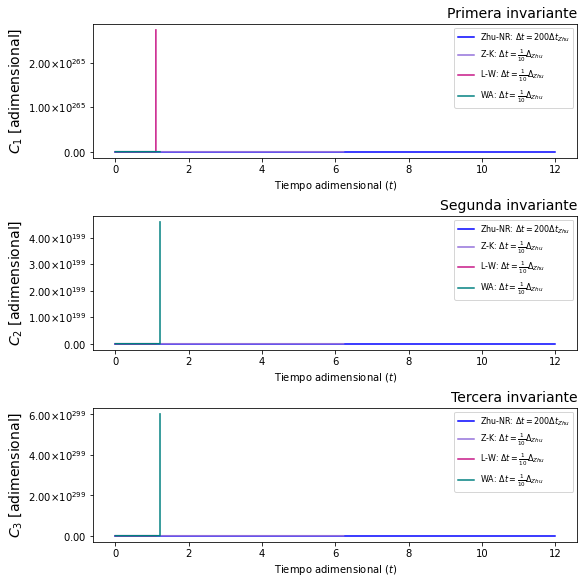

In [27]:
t_i = 0.00
t_f = 12.00

dt_NR = 0.0318
dt_expl = 1.59E-05
timstepi_NR=int(t_i/dt_NR)

timstepf_NR=int(t_f/dt_NR)

timtot_NR = timstepf_NR - timstepi_NR 

C1_NR_zoom = numpy.zeros(timtot_NR)
C2_NR_zoom = numpy.zeros(timtot_NR)
C3_NR_zoom = numpy.zeros(timtot_NR)

for ts in range(0,timtot_NR):
    C1_NR_zoom[ts] = C1_NR[ts+timstepi_NR]
    C2_NR_zoom[ts] = C2_NR[ts+timstepi_NR]
    C3_NR_zoom[ts] = C3_NR[ts+timstepi_NR]
    
timstepi_expl=int(t_i/dt_expl)

timstepf_expl=int(t_f/dt_expl)

timtot_expl = timstepf_expl - timstepi_expl 


C1_LW_zoom = numpy.zeros(timtot_expl)
C2_LW_zoom = numpy.zeros(timtot_expl)
C3_LW_zoom = numpy.zeros(timtot_expl)

for ts in range(0,timtot_expl):
    C1_LW_zoom[ts] = C1_LW[ts+timstepi_expl]
    C2_LW_zoom[ts] = C2_LW[ts+timstepi_expl]
    C3_LW_zoom[ts] = C3_LW[ts+timstepi_expl]

C1_WA_zoom = numpy.zeros(timtot_expl)
C2_WA_zoom = numpy.zeros(timtot_expl)
C3_WA_zoom = numpy.zeros(timtot_expl)

for ts in range(0,timtot_expl):
    C1_WA_zoom[ts] = C1_WA[ts+timstepi_expl]
    C2_WA_zoom[ts] = C2_WA[ts+timstepi_expl]
    C3_WA_zoom[ts] = C3_WA[ts+timstepi_expl]

C1_ZK_zoom = numpy.zeros(timtot_expl)
C2_ZK_zoom = numpy.zeros(timtot_expl)
C3_ZK_zoom = numpy.zeros(timtot_expl)

for ts in range(0,timtot_expl):
    C1_ZK_zoom[ts] = C1_ZK[ts+timstepi_expl]
    C2_ZK_zoom[ts] = C2_ZK[ts+timstepi_expl]
    C3_ZK_zoom[ts] = C3_ZK[ts+timstepi_expl]

tsteps_NR = numpy.linspace(t_i,t_f,timtot_NR)
tsteps_expl = numpy.linspace(t_i,t_f,timtot_expl)

fig,(ax0, ax1, ax2) = plt.subplots(3,1, constrained_layout = 'True', figsize=(8,8))

ax0.plot(tsteps_NR,C1_NR_zoom, color='blue', label = 'Zhu-NR: $\Delta t = 200\Delta t_{Zhu}$')
ax0.plot(tsteps_expl,C1_ZK_zoom, color='mediumpurple', label=r'Z-K: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax0.plot(tsteps_expl,C1_LW_zoom, color='mediumvioletred', label=r'L-W: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax0.plot(tsteps_expl,C1_WA_zoom, color='teal', label=r'WA: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax0.set_title("Primera invariante", fontsize='14', loc = 'right')
ax0.set_xlabel("Tiempo adimensional $(t)$")
ax0.set_ylabel("$ C_{1}$ [adimensional]", fontsize='14')
# ax0.ticklabel_format(useOffset=False, style='plain') # Descomentar si los decimales son pocos
ax0.legend(loc='best', fontsize='8')
ax0.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))

ax1.plot(tsteps_NR,C2_NR_zoom, color='blue', label = 'Zhu-NR: $\Delta t = 200\Delta t_{Zhu}$')
ax1.plot(tsteps_expl,C2_ZK_zoom, color='mediumpurple', label=r'Z-K: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax1.plot(tsteps_expl,C2_LW_zoom, color='mediumvioletred', label=r'L-W: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax1.plot(tsteps_expl,C2_WA_zoom, color='teal', label=r'WA: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax1.set_title("Segunda invariante", fontsize='14', loc = 'right')
ax1.set_xlabel("Tiempo adimensional $(t)$")
ax1.set_ylabel("$ C_{2}$ [adimensional]", fontsize='14')
# ax1.ticklabel_format(useOffset=False, style='plain') # Descomentar si los decimales son pocos
ax1.legend(loc='best', fontsize='8')
ax1.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))

ax2.plot(tsteps_NR,C3_NR_zoom, color='blue', label = 'Zhu-NR: $\Delta t = 200\Delta t_{Zhu}$')
ax2.plot(tsteps_expl,C3_ZK_zoom, color='mediumpurple', label=r'Z-K: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax2.plot(tsteps_expl,C3_LW_zoom, color='mediumvioletred', label=r'L-W: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax2.plot(tsteps_expl,C3_WA_zoom, color='teal', label=r'WA: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax2.set_title("Tercera invariante", fontsize='14', loc = 'right')
ax2.set_xlabel("Tiempo adimensional $(t)$")
ax2.set_ylabel("$ C_{3}$ [adimensional]", fontsize='14')
# ax2.ticklabel_format(useOffset=False, style='plain') # Descomentar si los decimales son pocos
ax2.legend(loc='best', fontsize='8')
ax2.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))

plt.show()
fig.savefig('Invariantes_sch_all.png',dpi=300)

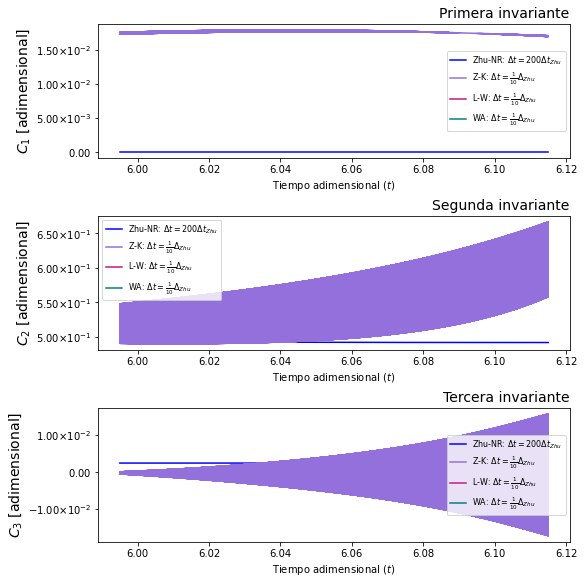

In [28]:
t_i = 5.995
t_f = 6.115

dt_NR = 0.0318
dt_expl = 1.59E-05
timstepi_NR=int(t_i/dt_NR)

timstepf_NR=int(t_f/dt_NR)

timtot_NR = timstepf_NR - timstepi_NR 

C1_NR_zoom = numpy.zeros(timtot_NR)
C2_NR_zoom = numpy.zeros(timtot_NR)
C3_NR_zoom = numpy.zeros(timtot_NR)

for ts in range(0,timtot_NR):
    C1_NR_zoom[ts] = C1_NR[ts+timstepi_NR]
    C2_NR_zoom[ts] = C2_NR[ts+timstepi_NR]
    C3_NR_zoom[ts] = C3_NR[ts+timstepi_NR]
    
timstepi_expl=int(t_i/dt_expl)

timstepf_expl=int(t_f/dt_expl)

timtot_expl = timstepf_expl - timstepi_expl 


C1_LW_zoom = numpy.zeros(timtot_expl)
C2_LW_zoom = numpy.zeros(timtot_expl)
C3_LW_zoom = numpy.zeros(timtot_expl)

for ts in range(0,timtot_expl):
    C1_LW_zoom[ts] = C1_LW[ts+timstepi_expl]
    C2_LW_zoom[ts] = C2_LW[ts+timstepi_expl]
    C3_LW_zoom[ts] = C3_LW[ts+timstepi_expl]

C1_WA_zoom = numpy.zeros(timtot_expl)
C2_WA_zoom = numpy.zeros(timtot_expl)
C3_WA_zoom = numpy.zeros(timtot_expl)

for ts in range(0,timtot_expl):
    C1_WA_zoom[ts] = C1_WA[ts+timstepi_expl]
    C2_WA_zoom[ts] = C2_WA[ts+timstepi_expl]
    C3_WA_zoom[ts] = C3_WA[ts+timstepi_expl]

C1_ZK_zoom = numpy.zeros(timtot_expl)
C2_ZK_zoom = numpy.zeros(timtot_expl)
C3_ZK_zoom = numpy.zeros(timtot_expl)

for ts in range(0,timtot_expl):
    C1_ZK_zoom[ts] = C1_ZK[ts+timstepi_expl]
    C2_ZK_zoom[ts] = C2_ZK[ts+timstepi_expl]
    C3_ZK_zoom[ts] = C3_ZK[ts+timstepi_expl]

tsteps_NR = numpy.linspace(t_i,t_f,timtot_NR)
tsteps_expl = numpy.linspace(t_i,t_f,timtot_expl)

fig,(ax0, ax1, ax2) = plt.subplots(3,1, constrained_layout = 'True', figsize=(8,8))

ax0.plot(tsteps_NR,C1_NR_zoom, color='blue', label = 'Zhu-NR: $\Delta t = 200\Delta t_{Zhu}$')
ax0.plot(tsteps_expl,C1_ZK_zoom, color='mediumpurple', label=r'Z-K: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax0.plot(tsteps_expl,C1_LW_zoom, color='mediumvioletred', label=r'L-W: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax0.plot(tsteps_expl,C1_WA_zoom, color='teal', label=r'WA: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax0.set_title("Primera invariante", fontsize='14', loc = 'right')
ax0.set_xlabel("Tiempo adimensional $(t)$")
ax0.set_ylabel("$ C_{1}$ [adimensional]", fontsize='14')
# ax0.ticklabel_format(useOffset=False, style='plain') # Descomentar si los decimales son pocos
ax0.legend(loc='best', fontsize='8')
ax0.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))

ax1.plot(tsteps_NR,C2_NR_zoom, color='blue', label = 'Zhu-NR: $\Delta t = 200\Delta t_{Zhu}$')
ax1.plot(tsteps_expl,C2_ZK_zoom, color='mediumpurple', label=r'Z-K: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax1.plot(tsteps_expl,C2_LW_zoom, color='mediumvioletred', label=r'L-W: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax1.plot(tsteps_expl,C2_WA_zoom, color='teal', label=r'WA: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax1.set_title("Segunda invariante", fontsize='14', loc = 'right')
ax1.set_xlabel("Tiempo adimensional $(t)$")
ax1.set_ylabel("$ C_{2}$ [adimensional]", fontsize='14')
# ax1.ticklabel_format(useOffset=False, style='plain') # Descomentar si los decimales son pocos
ax1.legend(loc='best', fontsize='8')
ax1.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))

ax2.plot(tsteps_NR,C3_NR_zoom, color='blue', label = 'Zhu-NR: $\Delta t = 200\Delta t_{Zhu}$')
ax2.plot(tsteps_expl,C3_ZK_zoom, color='mediumpurple', label=r'Z-K: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax2.plot(tsteps_expl,C3_LW_zoom, color='mediumvioletred', label=r'L-W: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax2.plot(tsteps_expl,C3_WA_zoom, color='teal', label=r'WA: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax2.set_title("Tercera invariante", fontsize='14', loc = 'right')
ax2.set_xlabel("Tiempo adimensional $(t)$")
ax2.set_ylabel("$ C_{3}$ [adimensional]", fontsize='14')
# ax2.ticklabel_format(useOffset=False, style='plain') # Descomentar si los decimales son pocos
ax2.legend(loc='best', fontsize='8')
ax2.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))

plt.show()
fig.savefig('Invariantes_sch_all_z1.png',dpi=300)

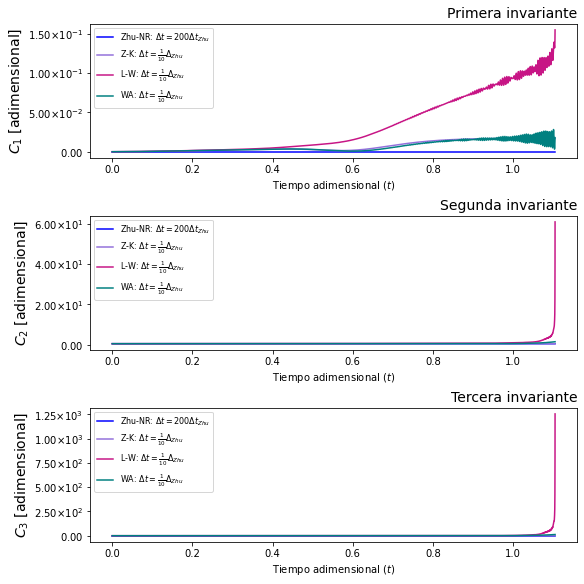

In [29]:
t_i = 0.00
t_f = 1.105

dt_NR = 0.0318
dt_expl = 1.59E-05
timstepi_NR=int(t_i/dt_NR)

timstepf_NR=int(t_f/dt_NR)

timtot_NR = timstepf_NR - timstepi_NR 

C1_NR_zoom = numpy.zeros(timtot_NR)
C2_NR_zoom = numpy.zeros(timtot_NR)
C3_NR_zoom = numpy.zeros(timtot_NR)

for ts in range(0,timtot_NR):
    C1_NR_zoom[ts] = C1_NR[ts+timstepi_NR]
    C2_NR_zoom[ts] = C2_NR[ts+timstepi_NR]
    C3_NR_zoom[ts] = C3_NR[ts+timstepi_NR]
    
timstepi_expl=int(t_i/dt_expl)

timstepf_expl=int(t_f/dt_expl)

timtot_expl = timstepf_expl - timstepi_expl 


C1_LW_zoom = numpy.zeros(timtot_expl)
C2_LW_zoom = numpy.zeros(timtot_expl)
C3_LW_zoom = numpy.zeros(timtot_expl)

for ts in range(0,timtot_expl):
    C1_LW_zoom[ts] = C1_LW[ts+timstepi_expl]
    C2_LW_zoom[ts] = C2_LW[ts+timstepi_expl]
    C3_LW_zoom[ts] = C3_LW[ts+timstepi_expl]

C1_WA_zoom = numpy.zeros(timtot_expl)
C2_WA_zoom = numpy.zeros(timtot_expl)
C3_WA_zoom = numpy.zeros(timtot_expl)

for ts in range(0,timtot_expl):
    C1_WA_zoom[ts] = C1_WA[ts+timstepi_expl]
    C2_WA_zoom[ts] = C2_WA[ts+timstepi_expl]
    C3_WA_zoom[ts] = C3_WA[ts+timstepi_expl]

C1_ZK_zoom = numpy.zeros(timtot_expl)
C2_ZK_zoom = numpy.zeros(timtot_expl)
C3_ZK_zoom = numpy.zeros(timtot_expl)

for ts in range(0,timtot_expl):
    C1_ZK_zoom[ts] = C1_ZK[ts+timstepi_expl]
    C2_ZK_zoom[ts] = C2_ZK[ts+timstepi_expl]
    C3_ZK_zoom[ts] = C3_ZK[ts+timstepi_expl]

tsteps_NR = numpy.linspace(t_i,t_f,timtot_NR)
tsteps_expl = numpy.linspace(t_i,t_f,timtot_expl)

fig,(ax0, ax1, ax2) = plt.subplots(3,1, constrained_layout = 'True', figsize=(8,8))

ax0.plot(tsteps_NR,C1_NR_zoom, color='blue', label = 'Zhu-NR: $\Delta t = 200\Delta t_{Zhu}$')
ax0.plot(tsteps_expl,C1_ZK_zoom, color='mediumpurple', label=r'Z-K: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax0.plot(tsteps_expl,C1_LW_zoom, color='mediumvioletred', label=r'L-W: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax0.plot(tsteps_expl,C1_WA_zoom, color='teal', label=r'WA: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax0.set_title("Primera invariante", fontsize='14', loc = 'right')
ax0.set_xlabel("Tiempo adimensional $(t)$")
ax0.set_ylabel("$ C_{1}$ [adimensional]", fontsize='14')
# ax0.ticklabel_format(useOffset=False, style='plain') # Descomentar si los decimales son pocos
ax0.legend(loc='best', fontsize='8')
ax0.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))

ax1.plot(tsteps_NR,C2_NR_zoom, color='blue', label = 'Zhu-NR: $\Delta t = 200\Delta t_{Zhu}$')
ax1.plot(tsteps_expl,C2_ZK_zoom, color='mediumpurple', label=r'Z-K: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax1.plot(tsteps_expl,C2_LW_zoom, color='mediumvioletred', label=r'L-W: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax1.plot(tsteps_expl,C2_WA_zoom, color='teal', label=r'WA: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax1.set_title("Segunda invariante", fontsize='14', loc = 'right')
ax1.set_xlabel("Tiempo adimensional $(t)$")
ax1.set_ylabel("$ C_{2}$ [adimensional]", fontsize='14')
# ax1.ticklabel_format(useOffset=False, style='plain') # Descomentar si los decimales son pocos
ax1.legend(loc='best', fontsize='8')
ax1.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))

ax2.plot(tsteps_NR,C3_NR_zoom, color='blue', label = 'Zhu-NR: $\Delta t = 200\Delta t_{Zhu}$')
ax2.plot(tsteps_expl,C3_ZK_zoom, color='mediumpurple', label=r'Z-K: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax2.plot(tsteps_expl,C3_LW_zoom, color='mediumvioletred', label=r'L-W: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax2.plot(tsteps_expl,C3_WA_zoom, color='teal', label=r'WA: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax2.set_title("Tercera invariante", fontsize='14', loc = 'right')
ax2.set_xlabel("Tiempo adimensional $(t)$")
ax2.set_ylabel("$ C_{3}$ [adimensional]", fontsize='14')
# ax2.ticklabel_format(useOffset=False, style='plain') # Descomentar si los decimales son pocos
ax2.legend(loc='best', fontsize='8')
ax2.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))

plt.show()
fig.savefig('Invariantes_sch_all_z2.png',dpi=300)

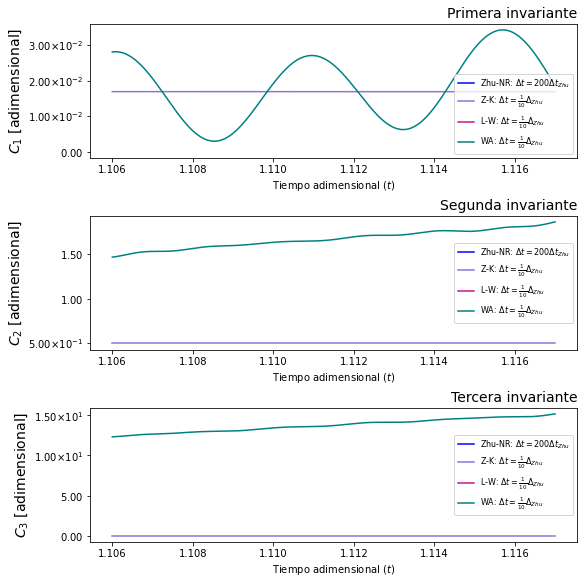

In [43]:
t_i = 1.106
t_f = 1.117
# t_f = 1.217

dt_NR = 0.0318
dt_expl = 1.59E-05
timstepi_NR=int(t_i/dt_NR)

timstepf_NR=int(t_f/dt_NR)

timtot_NR = timstepf_NR - timstepi_NR 

C1_NR_zoom = numpy.zeros(timtot_NR)
C2_NR_zoom = numpy.zeros(timtot_NR)
C3_NR_zoom = numpy.zeros(timtot_NR)

for ts in range(0,timtot_NR):
    C1_NR_zoom[ts] = C1_NR[ts+timstepi_NR]
    C2_NR_zoom[ts] = C2_NR[ts+timstepi_NR]
    C3_NR_zoom[ts] = C3_NR[ts+timstepi_NR]
    
timstepi_expl=int(t_i/dt_expl)

timstepf_expl=int(t_f/dt_expl)

timtot_expl = timstepf_expl - timstepi_expl 


C1_LW_zoom = numpy.zeros(timtot_expl)
C2_LW_zoom = numpy.zeros(timtot_expl)
C3_LW_zoom = numpy.zeros(timtot_expl)

for ts in range(0,timtot_expl):
    C1_LW_zoom[ts] = C1_LW[ts+timstepi_expl]
    C2_LW_zoom[ts] = C2_LW[ts+timstepi_expl]
    C3_LW_zoom[ts] = C3_LW[ts+timstepi_expl]

C1_WA_zoom = numpy.zeros(timtot_expl)
C2_WA_zoom = numpy.zeros(timtot_expl)
C3_WA_zoom = numpy.zeros(timtot_expl)

for ts in range(0,timtot_expl):
    C1_WA_zoom[ts] = C1_WA[ts+timstepi_expl]
    C2_WA_zoom[ts] = C2_WA[ts+timstepi_expl]
    C3_WA_zoom[ts] = C3_WA[ts+timstepi_expl]

C1_ZK_zoom = numpy.zeros(timtot_expl)
C2_ZK_zoom = numpy.zeros(timtot_expl)
C3_ZK_zoom = numpy.zeros(timtot_expl)

for ts in range(0,timtot_expl):
    C1_ZK_zoom[ts] = C1_ZK[ts+timstepi_expl]
    C2_ZK_zoom[ts] = C2_ZK[ts+timstepi_expl]
    C3_ZK_zoom[ts] = C3_ZK[ts+timstepi_expl]

tsteps_NR = numpy.linspace(t_i,t_f,timtot_NR)
tsteps_expl = numpy.linspace(t_i,t_f,timtot_expl)

fig,(ax0, ax1, ax2) = plt.subplots(3,1, constrained_layout = 'True', figsize=(8,8))

ax0.plot(tsteps_NR,C1_NR_zoom, color='blue', label = 'Zhu-NR: $\Delta t = 200\Delta t_{Zhu}$')
ax0.plot(tsteps_expl,C1_ZK_zoom, color='mediumpurple', label=r'Z-K: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax0.plot(tsteps_expl,C1_LW_zoom, color='mediumvioletred', label=r'L-W: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax0.plot(tsteps_expl,C1_WA_zoom, color='teal', label=r'WA: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax0.set_title("Primera invariante", fontsize='14', loc = 'right')
ax0.set_xlabel("Tiempo adimensional $(t)$")
ax0.set_ylabel("$ C_{1}$ [adimensional]", fontsize='14')
# ax0.ticklabel_format(useOffset=False, style='plain') # Descomentar si los decimales son pocos
ax0.legend(loc='best', fontsize='8')
ax0.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))

ax1.plot(tsteps_NR,C2_NR_zoom, color='blue', label = 'Zhu-NR: $\Delta t = 200\Delta t_{Zhu}$')
ax1.plot(tsteps_expl,C2_ZK_zoom, color='mediumpurple', label=r'Z-K: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax1.plot(tsteps_expl,C2_LW_zoom, color='mediumvioletred', label=r'L-W: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax1.plot(tsteps_expl,C2_WA_zoom, color='teal', label=r'WA: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax1.set_title("Segunda invariante", fontsize='14', loc = 'right')
ax1.set_xlabel("Tiempo adimensional $(t)$")
ax1.set_ylabel("$ C_{2}$ [adimensional]", fontsize='14')
# ax1.ticklabel_format(useOffset=False, style='plain') # Descomentar si los decimales son pocos
ax1.legend(loc='best', fontsize='8')
ax1.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))

ax2.plot(tsteps_NR,C3_NR_zoom, color='blue', label = 'Zhu-NR: $\Delta t = 200\Delta t_{Zhu}$')
ax2.plot(tsteps_expl,C3_ZK_zoom, color='mediumpurple', label=r'Z-K: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax2.plot(tsteps_expl,C3_LW_zoom, color='mediumvioletred', label=r'L-W: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax2.plot(tsteps_expl,C3_WA_zoom, color='teal', label=r'WA: $\Delta t = \frac{1}{10}\Delta_{Zhu}$')
ax2.set_title("Tercera invariante", fontsize='14', loc = 'right')
ax2.set_xlabel("Tiempo adimensional $(t)$")
ax2.set_ylabel("$ C_{3}$ [adimensional]", fontsize='14')
# ax2.ticklabel_format(useOffset=False, style='plain') # Descomentar si los decimales son pocos
ax2.legend(loc='best', fontsize='8')
ax2.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))

plt.show()
#dir_out="/home/aaron/Jupyter/Tesis/Tesis_codes/Figures_KdV/"
fig.savefig('Invariantes_sch_all_z3.png',dpi=300)

### Diagrama Hövmöller

Para graficar los diagramas Hövmöller requerimos las salidas de la integración de la KdV. En este caso, vamos a graficar líneas de contorno para visualizar las amplitudes de los solitones en todo el dominio, a distintos pasos de tiempo.

NOTA: si es necesario, declarar nuevamente las variables del esquema para el graficado.



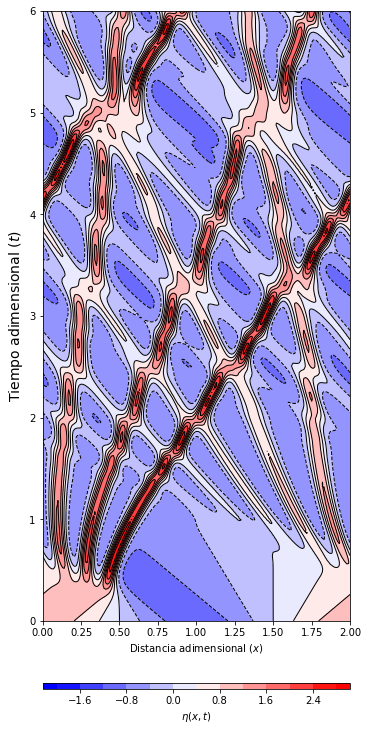

In [13]:
# Importamos los datos:---------------------------------------

U_xt_NR = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/U_xt_NR_N_201_PT_0.0318_TFNL_12.0_TDC_0.0445.npy')
# U_xt_ZK = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/U_xt_ZK_N_201_PT_1.6e-05_TFNL_12.0_TDC_0.0507.npy')
# U_xt_LW = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/U_xt_LW_N_201_PT_1.6e-05_TFNL_12.0_TDC_0.0484.npy')
# U_xt_WA = numpy.load('/home/aaron/Jupyter/Tesis/Tesis_codes/Salidas_KdV/U_xt_WA_N_201_PT_1.6e-05_TFNL_12.0_TDC_0.0535.npy')

# Creamos arreglos para redefinir los límites de graficado----
# (En este experimento todas las salidas tienen el mismo ngp)

(ngrd, tsteps1) = U_xt_NR.shape
# (ngrd, tsteps2) = U_xt_ZK.shape
# (ngrd, tsteps3) = U_xt_WA.shape
# (ngrd, tsteps4) = U_xt_LW.shape

# tpo1,tpo2,tpo3, tpo4 = [numpy.linspace(0,12,num) \
#                              for num in [tsteps1,tsteps2,tsteps3,tsteps4]]

tpo1 = numpy.linspace(0,12,tsteps1)

tiempo_i = 0.00
tiempo_f = 6.00

# delta1 = 1.59E-05
deltaNR = 0.0318

# timstepi_1=int(tiempo_i/delta1)

# timstepf_1=int(tiempo_f/delta1)

# timtot_1 = timstepf_1 - timstepi_1 


timstepi_NR=int(tiempo_i/deltaNR)

timstepf_NR=int(tiempo_f/deltaNR)

timtot_NR = timstepf_NR - timstepi_NR


# Arreglos para el guardado del acercamiento de los datos------

U_zoom_NR=numpy.zeros([ngrd,timtot_NR])

for ts in range(0,timtot_NR):
    U_zoom_NR[:,ts] = U_xt_NR[:,ts+timstepi_NR]

# U_zoom_ZK=numpy.zeros([ngrd,timtot_1])
# U_zoom_WA=numpy.zeros([ngrd,timtot_1])
# U_zoom_LW=numpy.zeros([ngrd,timtot_1])

# for ts in range(0,timtot_1):
#     U_zoom_ZK[:,ts] = U_xt_ZK[:,ts+timstepi_1]
#     U_zoom_WA[:,ts] = U_xt_WA[:,ts+timstepi_1]
#     U_zoom_LW[:,ts] = U_xt_LW[:,ts+timstepi_1]

# Preparamos arreglos para contornos de superficie--------------
xgrd = numpy.linspace(0,2,ngrd) 
t_arr = numpy.linspace(tiempo_i,tiempo_f,timtot_NR)
X, Y = numpy.meshgrid(xgrd,t_arr)
U_plot_NR = U_zoom_NR.transpose() # Lineas de superficie

clevs=numpy.arange(-2,3,0.40) # Resolucióń de los gradientes

fig, ax2 = plt.subplots(1, constrained_layout = 'True', figsize=(5,10))

cf = ax2.contourf(X, Y, U_plot_NR, clevs, cmap=plt.cm.bwr, extend='both')
cs = ax2.contour(X, Y, U_plot_NR, clevs, colors='k', linewidths=1)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)
cbar.set_label('$\eta (x,t)$')

# ax2.set_title(r'NR: $\Delta t = 200Delta_{Zhu}$', fontsize='14', loc = 'center')
ax2.set_xlabel("Distancia adimensional $(x)$")
ax2.set_ylabel("Tiempo adimensional $(t)$", fontsize='14')

# fig.suptitle('$\Delta t=1.59$x$10^{-4}$', fontsize='16')

plt.show()
# fig.savefig('Hovmoller_NR.png',dpi=300)

### Gráfica de solitones

#### Con condición de Zabuzky



In [14]:
# U_xt_NR = numpy.load('/home/cca/i.5006/alumnos/a.7026/U_xt_NR_N_201_PT_0.0318_TFNL_12.0_TDC_0.0445.npy')

# Definimos arreglos
(ngrd, tstepsNR) = U_xt_NR.shape

# El argumento siguiente es si se desea cargar varias salidas
# tpo1, tpo4, tpo5 = [numpy.linspace(0,12,num) \
#                                  for num in [tsteps1, tsteps4, tsteps5]]

tpoNR = numpy.linspace(0,12,tstepsNR)

L=2
ng = 201 # Número de puntos en el estencil

UNR=numpy.zeros(ngrd)

tB = 1.00/numpy.pi # Tiempo de ruptura (ZK,1965)
# #--------------------------------------------
# delt_e1=0.000159

# t0_1=int(0.00/delt_e1)
# t1_1=int(tB/delt_e1)
# t2_1=int(3.6*tB/delt_e1)

# U0_1=U_xt_1[:,t0_1]
# U1_1=U_xt_1[:,t1_1]
# U2_1=U_xt_1[:,t2_1]

# #------------------------------------------------
# delt_e4=0.0159

# t0_4=int(00.00/delt_e4)
# t1_4=int(tB/delt_e4)
# t2_4=int(3.6*tB/delt_e4)

# U0_4=U_xt_4[:,t0_4]
# U1_4=U_xt_4[:,t1_4]
# U2_4=U_xt_4[:,t2_4]

#------------------------------------------------
delt_e5=0.0318

t0_5=int(00.00/delt_e5) # C.I
t1_5=int(tB/delt_e5)    # Tiempo de ruptura
t2_5=int(3.6*tB/delt_e5) # Postruptura

U0_5=U_xt_NR[:,t0_5]
U1_5=U_xt_NR[:,t1_5]
U2_5=U_xt_NR[:,t2_5]

#--------------DEFINIMOS MALLA--------------------------

x=numpy.linspace(0,L,ngrd)


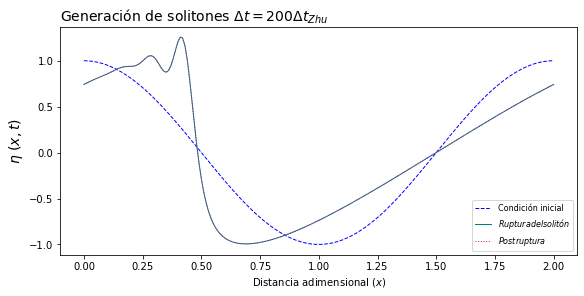

In [19]:
fig2,ax3 = plt.subplots(1, constrained_layout = 'True', figsize=(8,4))

ax3.plot(x,U0_5,linewidth=1, color='blue', ls='--',label='Condición inicial')
ax3.plot(x,U1_5,linewidth=1, color='teal', label='$Ruptura del solitón$')
ax3.plot(x,U1_5,linewidth=1, color='mediumvioletred', ls=':', label='$Postruptura$')
ax3.set_title('Generación de solitones $\Delta t = 200\Delta t_{Zhu}$', fontsize='14', loc = 'left')
ax3.set_xlabel("Distancia adimensional $(x)$")
ax3.set_ylabel("$ \eta \ (x,t)$", fontsize='14')
ax3.legend(loc='lower right', fontsize='8')


# fig2.suptitle('Evolución de la KdV con Zhu-NR a distintos $\Delta t$', fontsize='20')

plt.show()
# fig2.savefig('evol_zhu_1.png',dpi=300)

#### Con solución analítica

<div style="text-align: justify">  
Para graficar la solución analítica se requiere correr desde cero el esquema, usando la solución analítica como condición inicial. Para cualquiera de los demás experimentos, se sigue exactamente la misma secuencia antes escrita en el notebook. Se refiere al usuario al escrito para consultar las gráficas.
</div> 